In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

from matplotlib.figure import Figure

from mpl_toolkits.mplot3d import Axes3D

from gradient_descent_methods import gradient_descent, conjugate_gradient_fr, alpha_backtracking, alpha_const, alpha_diminishing, Function2D, Grad2D

Функция $f(x, y) = x^4 - 2x^2 + y^3 - 3y$

In [3]:
def f(x: np.ndarray | float, y: np.ndarray | float) -> np.ndarray | float:
    return np.pow(x, 4) - 2 * np.pow(x, 2) + np.pow(y, 3) - 3 * y

Градиент $f(x, y)$ = $(\frac{\partial f}{\partial x}(x, y), \frac{\partial f}{\partial y}(x, y))$

In [4]:
def gradient_f(x: np.ndarray | float, y: np.ndarray | float) -> tuple[np.ndarray | float, np.ndarray | float]:
    f_x: np.ndarray | float = 4 * x**3 - 4 * x
    f_y: np.ndarray | float = 3 * y**2 - 3
    return f_x, f_y

Задаем необходимые константы

In [5]:
X_MIN: int = -2
X_MAX: int = 2
Y_MIN: int = -2
Y_MAX: int = 2
COUNT_NUMBERS: int = 200

CRITICAL_POINTS: list[tuple[int]] = [(-1, -1), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 1)]

Построение графика поверхности $f(x, y)$

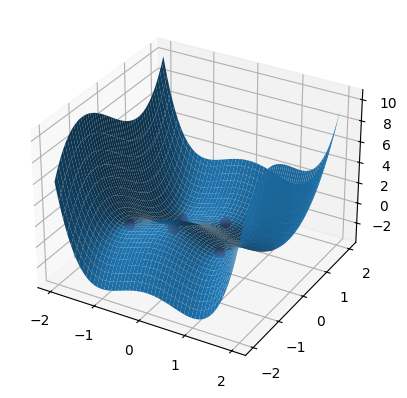

In [6]:
x: np.ndarray = np.linspace(X_MIN, X_MAX, COUNT_NUMBERS)
y: np.ndarray = np.linspace(Y_MIN, Y_MAX, COUNT_NUMBERS)

x, y = np.meshgrid(x, y)

f_x, f_y = gradient_f(x, y)

z: np.ndarray = f(x, y)

figure: Figure
axes: Axes3D
figure, axes = plt.subplots(subplot_kw={"projection": "3d"})
axes.plot_surface(x, y, z)

for x_0, y_0 in CRITICAL_POINTS:
    z_0 = f(x_0, y_0)
    axes.scatter3D(x_0, y_0, z_0, s=50, c="red")

plt.show()

Построение линий уровня $f(x, y)$

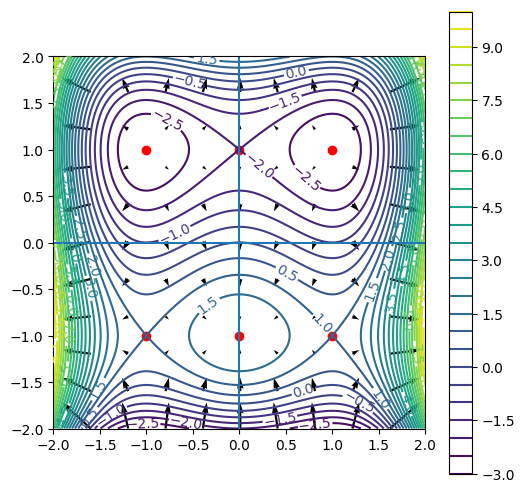

In [7]:
plt.figure(figsize=(6, 6))
countour_set = plt.contour(x, y, z, levels=25)

for x_0, y_0 in CRITICAL_POINTS:
    plt.scatter(x_0, y_0, c="red")

step: int = 20
plt.quiver(
    x[::step, ::step],
    y[::step, ::step],
    f_x[::step, ::step],
    f_y[::step, ::step]
)

plt.clabel(countour_set)
plt.colorbar(countour_set)
plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect("equal", "box")
plt.show()

Тест методов град. спуска для $f(x,y)$

In [8]:
x0, y0 = 0.5, 0.5

results = {}

# 1) Градиентный спуск с постоянным шагом
x_gd_const, y_gd_const, hist_const = gradient_descent(
    f,
    gradient_f,
    x0=x0,
    y0=y0,
    alpha_rule=alpha_const,
    eps=1e-6,
    max_iter=10_000,
)
results["GD_const"] = (x_gd_const, y_gd_const, len(hist_const) - 1, f(x_gd_const, y_gd_const))

# 2) Градиентный спуск с убывающим шагом
x_gd_dim, y_gd_dim, hist_dim = gradient_descent(
    f,
    gradient_f,
    x0=x0,
    y0=y0,
    alpha_rule=alpha_diminishing,
    eps=1e-6,
    max_iter=10_000,
)
results["GD_diminishing"] = (x_gd_dim, y_gd_dim, len(hist_dim) - 1, f(x_gd_dim, y_gd_dim))

# 3) Градиентный спуск с backtracking (Armijo)
x_gd_bt, y_gd_bt, hist_bt = gradient_descent(
    f,
    gradient_f,
    x0=x0,
    y0=y0,
    alpha_rule=alpha_backtracking,
    eps=1e-6,
    max_iter=10_000,
)
results["GD_backtracking"] = (x_gd_bt, y_gd_bt, len(hist_bt) - 1, f(x_gd_bt, y_gd_bt))

# 4) Метод сопряжённых градиентов Флетчера–Ривса
x_fr, y_fr, hist_fr = conjugate_gradient_fr(
    f,
    gradient_f,
    x0=x0,
    y0=y0,
    eps=1e-6,
    max_iter=10_000,
)
results["FR"] = (x_fr, y_fr, len(hist_fr) - 1, f(x_fr, y_fr))

print("Результаты тестирования (метод : x*, y*, f(x*, y*), число итераций):\n")
for name, (x_star, y_star, iters, f_star) in results.items():
    print(f"{name:>16}:  x* = {x_star: .6f},  y* = {y_star: .6f},  f* = {f_star: .6f},  iters = {iters}")

Результаты тестирования (метод : x*, y*, f(x*, y*), число итераций):

        GD_const:  x* =  1.000000,  y* =  1.000000,  f* = -3.000000,  iters = 43
  GD_diminishing:  x* =  0.999445,  y* =  0.998530,  f* = -2.999992,  iters = 10000
 GD_backtracking:  x* =  1.000000,  y* =  1.000000,  f* = -3.000000,  iters = 17
              FR:  x* =  1.000000,  y* =  1.000000,  f* = -3.000000,  iters = 42


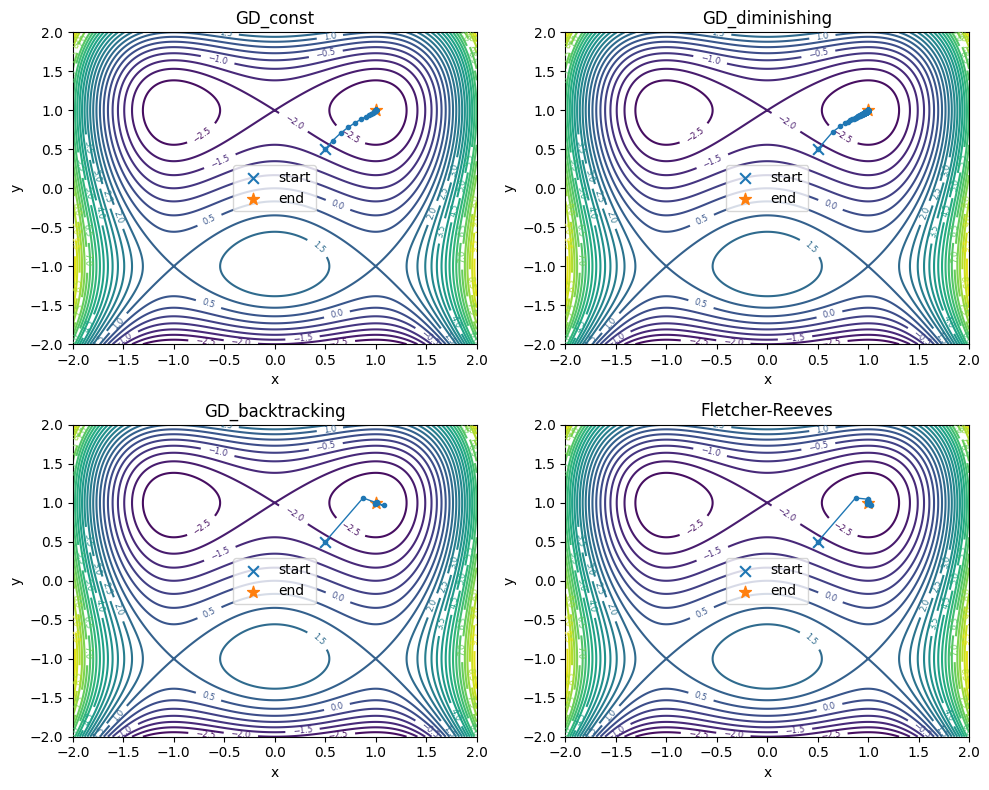

In [9]:
x_vals = np.linspace(-2.0, 2.0, 400)
y_vals = np.linspace(-2.0, 2.0, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

def extract_xy(history):
    xs = [p[0] for p in history]
    ys = [p[1] for p in history]
    return np.array(xs), np.array(ys)

traj_const_x, traj_const_y = extract_xy(hist_const)
traj_dim_x, traj_dim_y     = extract_xy(hist_dim)
traj_bt_x, traj_bt_y       = extract_xy(hist_bt)
traj_fr_x, traj_fr_y       = extract_xy(hist_fr)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

methods_info = [
    ("GD_const", traj_const_x, traj_const_y),
    ("GD_diminishing", traj_dim_x, traj_dim_y),
    ("GD_backtracking", traj_bt_x, traj_bt_y),
    ("Fletcher-Reeves", traj_fr_x, traj_fr_y),
]

for ax, (title, xs, ys) in zip(axes.ravel(), methods_info):
    cs = ax.contour(X, Y, Z, levels=30)
    ax.clabel(cs, inline=1, fontsize=6)

    ax.plot(xs, ys, marker="o", markersize=3, linewidth=1)

    ax.scatter(xs[0], ys[0], marker="x", s=60, label="start")
    ax.scatter(xs[-1], ys[-1], marker="*", s=80, label="end")

    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()

plt.tight_layout()
plt.show()

Розенброк

In [10]:
def f_rosenbrock(x: float, y: float) -> float:
    return (1 - x)**2 + 100 * (y - x**2)**2

def grad_rosenbrock(x: float, y: float) -> tuple[float, float]:
    dfx = -2 * (1 - x) - 400 * x * (y - x**2)
    dfy = 200 * (y - x**2)
    return dfx, dfy

Растригин

In [11]:
A = 10.0

def f_rastrigin(x: float, y: float) -> float:
    return 2 * A + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

def grad_rastrigin(x: float, y: float) -> tuple[float, float]:
    dfx = 2 * x + 2 * np.pi * A * np.sin(2 * np.pi * x)
    dfy = 2 * y + 2 * np.pi * A * np.sin(2 * np.pi * y)
    return dfx, dfy

Функция Бута

In [12]:
def f_booth(x: float, y: float) -> float:
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def grad_booth(x: float, y: float) -> tuple[float, float]:
    a = x**2 + y - 11
    b = x + y**2 - 7
    dfx = 4 * a * x + 2 * b
    dfy = 2 * a + 4 * b * y
    return dfx, dfy

In [13]:
def numeric_grad(f: Function2D,
                 x: float,
                 y: float,
                 h: float = 1e-6) -> tuple[float, float]:
    fx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    fy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return fx, fy

Eggholder

In [14]:
def f_eggholder(x: float, y: float) -> float:
    term1 = -(y + 47) * np.sin(np.sqrt(np.abs(x / 2 + (y + 47))))
    term2 = -x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    return term1 + term2

def grad_eggholder(x: float, y: float) -> tuple[float, float]:
    return numeric_grad(f_eggholder, x, y)

Плохо масштабированная

In [15]:
def f_bad_scale(x: float, y: float) -> float:
    return (1000.0 * x)**2 + (0.001 * y)**2

def grad_bad_scale(x: float, y: float) -> tuple[float, float]:
    dfx = 2 * (1000.0**2) * x
    dfy = 2 * (0.001**2) * y 
    return dfx, dfy

Изом

In [16]:
def f_easom(x: float, y: float) -> float:
    return -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

def grad_easom(x: float, y: float) -> tuple[float, float]:
    return numeric_grad(f_easom, x, y)

"Та самая задача из КР"

In [17]:
def f_kr(x: float, y: float) -> float:
    return np.sin(x**2 - 3 * y**2 + 3) * np.cos(2 * x + 1 + np.exp(y))

def grad_kr(x: float, y: float) -> tuple[float, float]:
    return numeric_grad(f_kr, x, y)

In [18]:
test_problems = {
    "rosenbrock": {
        "f": f_rosenbrock,
        "grad": grad_rosenbrock,
        "start": (-1.2, 1.0),
    },
    "rastrigin": {
        "f": f_rastrigin,
        "grad": grad_rastrigin,
        "start": (3.0, 3.0),
    },
    "booth": {
        "f": f_booth,
        "grad": grad_booth,
        "start": (0.0, 0.0),
    },
    "eggholder": {
        "f": f_eggholder,
        "grad": grad_eggholder,
        "start": (0.0, 0.0),
    },
    "bad_scale": {
        "f": f_bad_scale,
        "grad": grad_bad_scale,
        "start": (1.0, 1.0),
    },
    "easom": {
        "f": f_easom,
        "grad": grad_easom,
        "start": (0.0, 0.0),
    },
    "kr_task": {
        "f": f_kr,
        "grad": grad_kr,
        "start": (0.0, 0.0),
    },
}

In [27]:
def alpha_const_small(f, grad_f, k, x, y, gx, gy, alpha0: float = 1e-6) -> float:
    return alpha0


def alpha_diminishing_small(f, grad_f, k, x, y, gx, gy, alpha0: float = 1e-6) -> float:
    return alpha0 / (1 + k)

In [28]:
eps_values = [10**(-k) for k in range(2, 7)]

def run_on_problem(name: str,
                   f: Function2D,
                   grad_f: Grad2D,
                   x0: float,
                   y0: float):
    print(f"\Функция: {name}")
    print(f"Начальная точка: x0 = {x0}, y0 = {y0}\n")

    methods = {
        "GD_const":        lambda eps: gradient_descent(f, grad_f, x0, y0, alpha_const_small, eps=eps),
        "GD_diminishing":  lambda eps: gradient_descent(f, grad_f, x0, y0, alpha_diminishing_small, eps=eps),
        "GD_backtracking": lambda eps: gradient_descent(f, grad_f, x0, y0, alpha_backtracking, eps=eps),
        "Fletcher-Reeves": lambda eps: conjugate_gradient_fr(f, grad_f, x0, y0, eps=eps),
    }

    results: list[dict] = []

    for eps in eps_values:
        for mname, method in methods.items():
            t0 = time.perf_counter()
            x_star, y_star, history = method(eps)
            t1 = time.perf_counter()

            iters = len(history) - 1
            f_star = f(x_star, y_star)

            results.append({
                "problem": name,
                "method": mname,
                "eps": eps,
                "iters": iters,
                "x_star": x_star,
                "y_star": y_star,
                "f_star": f_star,
                "time": t1 - t0,
            })

            print(
                f"{mname:16} | eps = {eps: .0e} | "
                f"iters = {iters:5d} | "
                f"x* = {x_star: .6f}, y* = {y_star: .6f}, f* = {f_star: .6f} | "
                f"time = {t1 - t0:.4f} s"
            )

    return results


all_results: list[dict] = []
for pname, prob in test_problems.items():
    all_results.extend(
        run_on_problem(pname, prob["f"], prob["grad"], *prob["start"])
    )

\Функция: rosenbrock
Начальная точка: x0 = -1.2, y0 = 1.0

GD_const         | eps =  1e-02 | iters = 100000 | x* = -0.952332, y* =  0.914970, f* =  3.818054 | time = 0.1954 s
GD_diminishing   | eps =  1e-02 | iters = 100000 | x* = -1.197417, y* =  1.001055, f* =  23.556081 | time = 0.2258 s
GD_backtracking  | eps =  1e-02 | iters =  2435 | x* =  0.992130, y* =  0.984306, f* =  0.000062 | time = 0.0184 s
Fletcher-Reeves  | eps =  1e-02 | iters =   148 | x* =  0.993542, y* =  0.987103, f* =  0.000042 | time = 0.0016 s
GD_const         | eps =  1e-03 | iters = 100000 | x* = -0.952332, y* =  0.914970, f* =  3.818054 | time = 0.1888 s
GD_diminishing   | eps =  1e-03 | iters = 100000 | x* = -1.197417, y* =  1.001055, f* =  23.556081 | time = 0.2011 s
GD_backtracking  | eps =  1e-03 | iters =  5231 | x* =  0.999210, y* =  0.998418, f* =  0.000001 | time = 0.0375 s
Fletcher-Reeves  | eps =  1e-03 | iters =   167 | x* =  1.000585, y* =  1.001174, f* =  0.000000 | time = 0.0019 s
GD_const       

C:\Users\mezgo\AppData\Local\Temp\ipykernel_7440\684455765.py:2: RuntimeWarning: overflow encountered in exp
  return np.sin(x**2 - 3 * y**2 + 3) * np.cos(2 * x + 1 + np.exp(y))
C:\Users\mezgo\AppData\Local\Temp\ipykernel_7440\684455765.py:2: RuntimeWarning: invalid value encountered in cos
  return np.sin(x**2 - 3 * y**2 + 3) * np.cos(2 * x + 1 + np.exp(y))


Fletcher-Reeves  | eps =  1e-02 | iters = 100000 | x* = -13032.203698, y* =  250.484809, f* =  0.103224 | time = 3.0462 s
GD_const         | eps =  1e-03 | iters = 100000 | x* =  0.024166, y* =  0.014610, f* = -0.066721 | time = 2.0220 s
GD_diminishing   | eps =  1e-03 | iters = 100000 | x* =  0.000003, y* =  0.000002, f* = -0.058728 | time = 2.0101 s
GD_backtracking  | eps =  1e-03 | iters =    23 | x* =  0.072338, y* =  0.691481, f* = -1.000000 | time = 0.0050 s
Fletcher-Reeves  | eps =  1e-03 | iters = 100000 | x* = -13032.203698, y* =  250.484809, f* =  0.103224 | time = 3.1012 s
GD_const         | eps =  1e-04 | iters = 100000 | x* =  0.024166, y* =  0.014610, f* = -0.066721 | time = 2.1477 s
GD_diminishing   | eps =  1e-04 | iters = 100000 | x* =  0.000003, y* =  0.000002, f* = -0.058728 | time = 2.0365 s
GD_backtracking  | eps =  1e-04 | iters =    30 | x* =  0.072449, y* =  0.691489, f* = -1.000000 | time = 0.0046 s
Fletcher-Reeves  | eps =  1e-04 | iters = 100000 | x* = -13032

In [21]:
df = pd.DataFrame(all_results)
df.head()

,problem,method,eps,iters,x_star,y_star,f_star,time
0,rosenbrock,GD_const,0.010,100000,-1.083282,1.049277,5.883226,0.303666
1,rosenbrock,GD_diminishing,0.010,100000,-1.199974,1.000011,24.193445,0.230290
2,rosenbrock,GD_backtracking,0.010,2435,0.992130,0.984306,0.000062,0.020071
3,rosenbrock,Fletcher-Reeves,0.010,148,0.993542,0.987103,0.000042,0.001786
4,rosenbrock,GD_const,0.001,100000,-1.083282,1.049277,5.883226,0.209715


In [22]:
rosen = df[df["problem"] == "rosenbrock"].copy()
rosen.sort_values(["method", "eps"], inplace=True)
print(rosen.to_markdown(index=False))

| problem    | method          |    eps |   iters |    x_star |   y_star |       f_star |      time |
|:-----------|:----------------|-------:|--------:|----------:|---------:|-------------:|----------:|
| rosenbrock | Fletcher-Reeves | 1e-06  |     237 |  0.999999 | 0.999998 |  9.32432e-13 | 0.0024514 |
| rosenbrock | Fletcher-Reeves | 1e-05  |     191 |  1.00001  | 1.00001  |  4.01544e-11 | 0.0020921 |
| rosenbrock | Fletcher-Reeves | 0.0001 |     179 |  1.00007  | 1.00015  |  5.29268e-09 | 0.0017885 |
| rosenbrock | Fletcher-Reeves | 0.001  |     167 |  1.00059  | 1.00117  |  3.4336e-07  | 0.0018033 |
| rosenbrock | Fletcher-Reeves | 0.01   |     148 |  0.993542 | 0.987103 |  4.17568e-05 | 0.0017858 |
| rosenbrock | GD_backtracking | 1e-06  |   13756 |  0.999999 | 0.999998 |  6.12002e-13 | 0.0853441 |
| rosenbrock | GD_backtracking | 1e-05  |   10916 |  0.999992 | 0.999984 |  6.1319e-11  | 0.092357  |
| rosenbrock | GD_backtracking | 0.0001 |    8058 |  0.999921 | 0.999841 |  6.3296